In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from software.data_collector import get_data_for_period
from software.data_processor import process_data
from software.tasks import run_back_test
import mplfinance as mpf

%matplotlib inline
sns.set_style('darkgrid')

start_date = "2024-10-11 09:30:00"
end_date = "2024-10-11 12:00:00"
period = "1d"
ticker = "MSFT"
interval = "1m"
initial_cash = 1000

data = get_data_for_period(ticker=ticker, start_date=start_date, end_date=end_date, interval=interval)
period_data = f"{start_date}_{end_date}"
data = process_data(data, ticker=ticker, period=period_data)

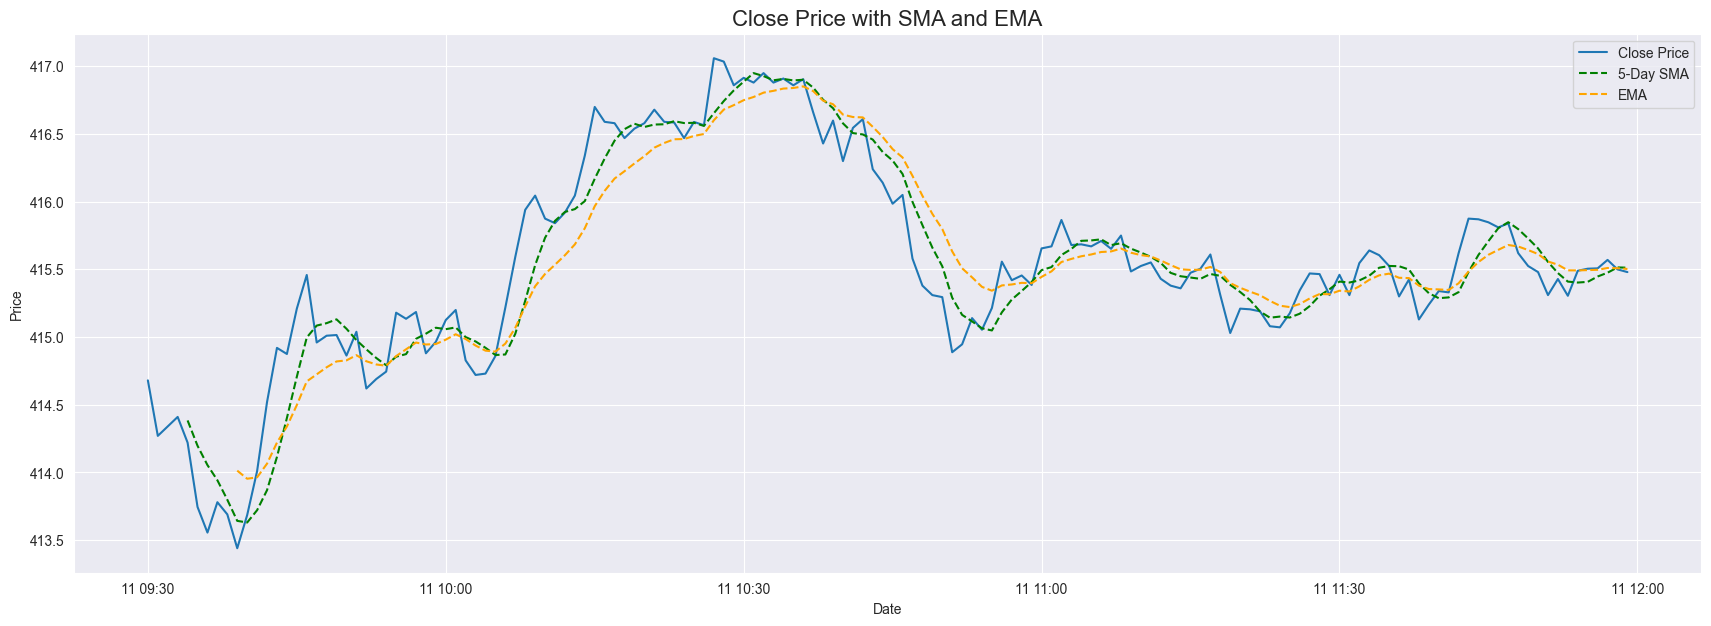

In [2]:
from software.plot_draws import plot_ema_and_sma


plot_ema_and_sma(data)

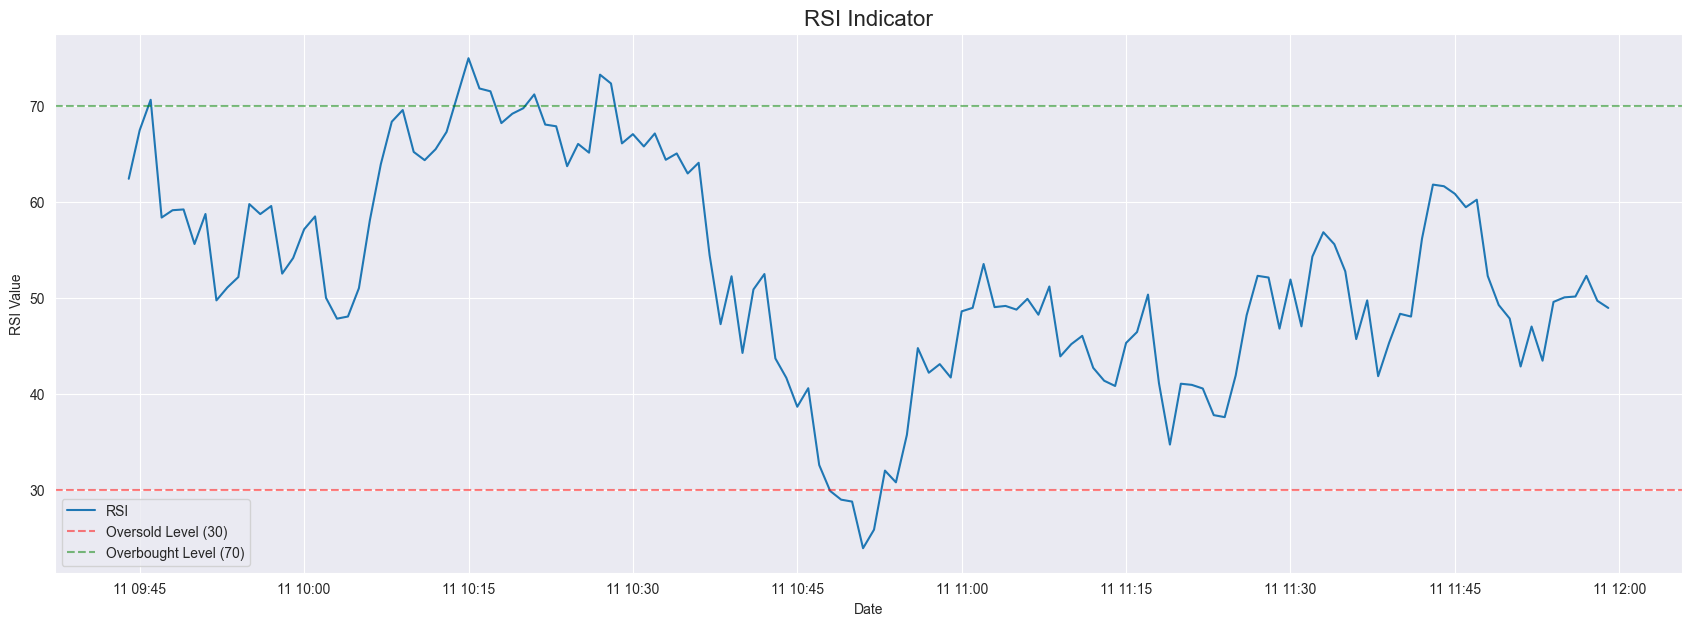

In [3]:
from software.plot_draws import plot_rsi

plot_rsi(data)

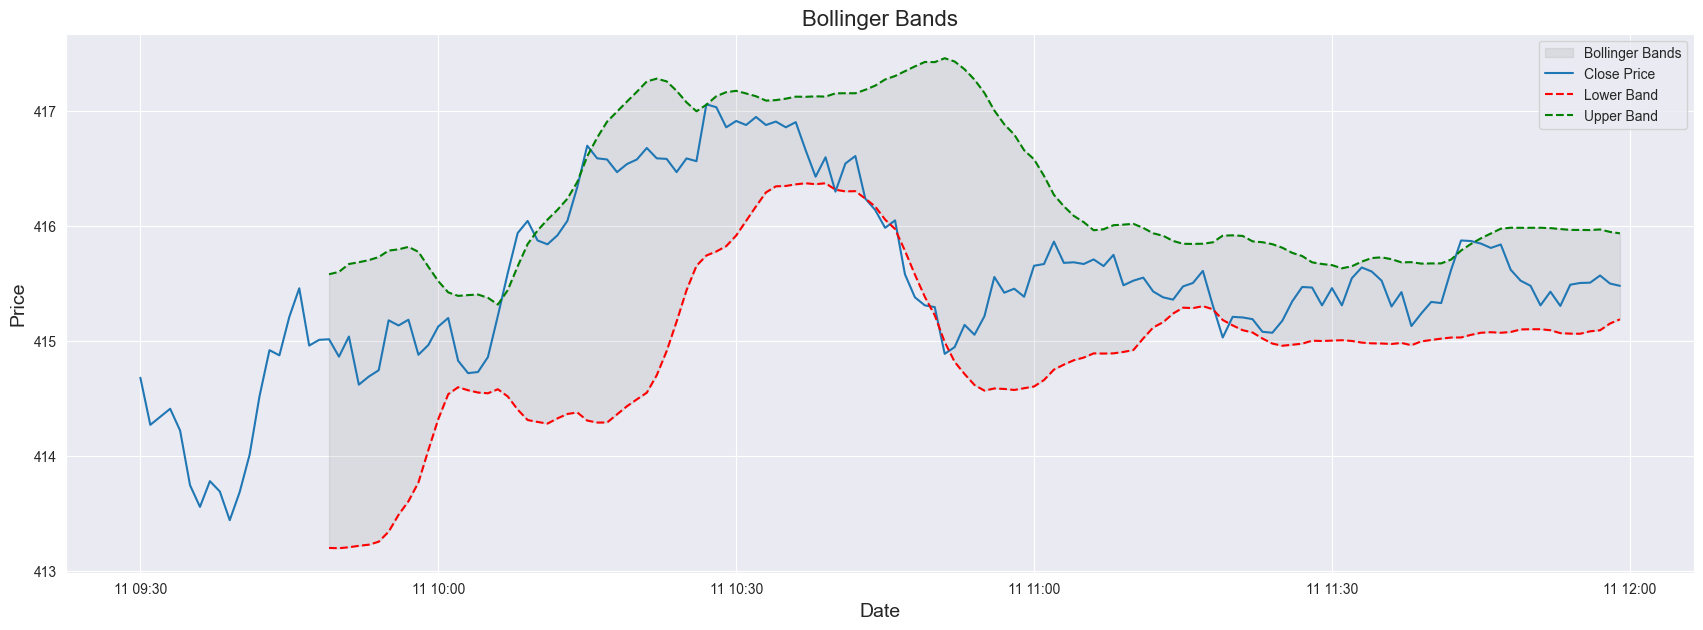

In [4]:
from software.plot_draws import plot_bollinger_bands

plot_bollinger_bands(data)

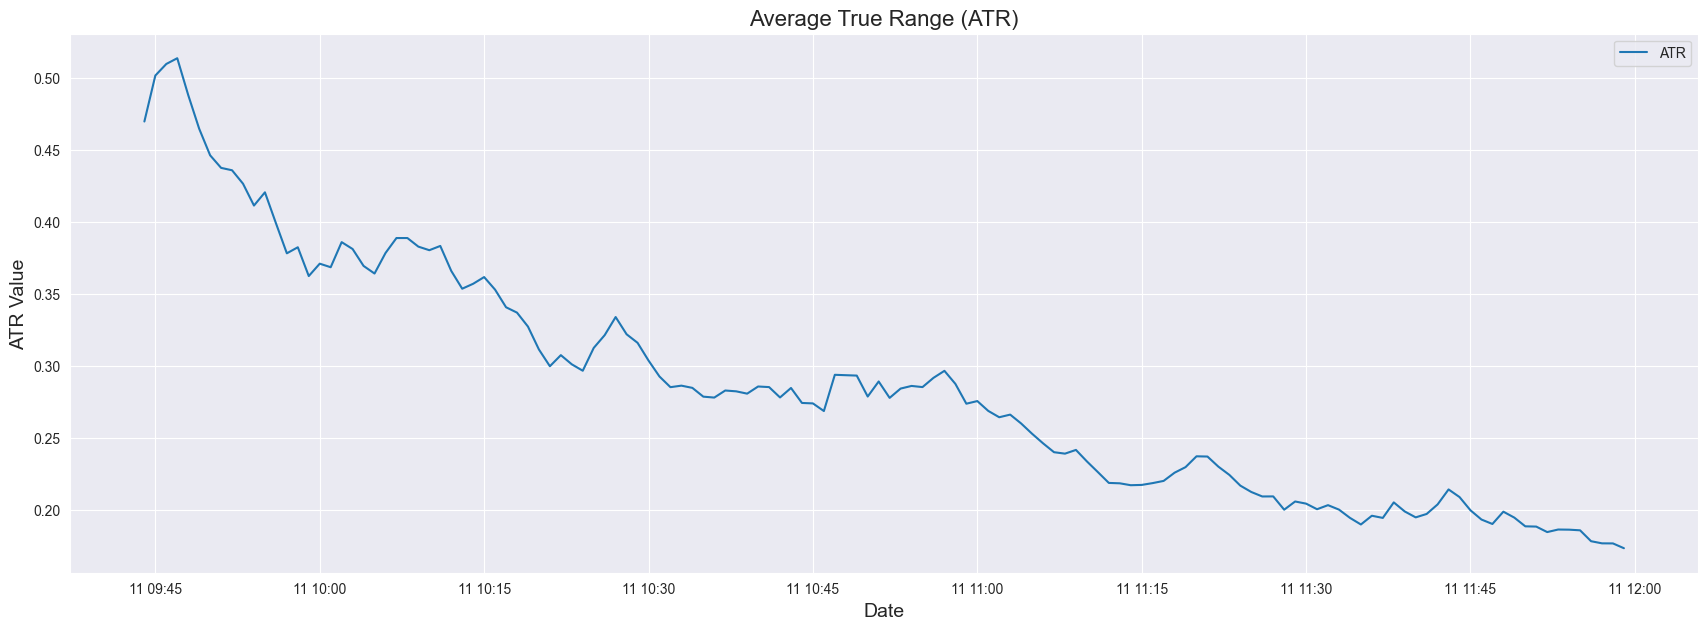

In [5]:
from software.plot_draws import plot_atr

plot_atr(data)

In [6]:
from software.strategy import generate_signals


processed_data = generate_signals(data)

print("processed_data.head(): ", processed_data.head(), "\n")
print("data.columns: ", data.columns, "\n")

processed_data.head():                             Signal       Close        High         Low  \
Datetime                                                                
2024-10-11 10:03:00-04:00    -1.0  414.720001  414.859985  414.535004   
2024-10-11 10:04:00-04:00     0.0  414.730011  414.730011  414.500000   
2024-10-11 10:05:00-04:00     0.0  414.859985  414.920013  414.618988   
2024-10-11 10:06:00-04:00     1.0  415.218597  415.399994  414.850006   
2024-10-11 10:07:00-04:00     0.0  415.592010  415.595001  415.079987   

                           ATR_Stop_Loss  ATR_Take_Profit  
Datetime                                                   
2024-10-11 10:03:00-04:00       0.571981         1.143962  
2024-10-11 10:04:00-04:00       0.554350         1.108700  
2024-10-11 10:05:00-04:00       0.546413         1.092826  
2024-10-11 10:06:00-04:00       0.567795         1.135590  
2024-10-11 10:07:00-04:00       0.583425         1.166851   

data.columns:  Index(['Open', 'High', 'Low

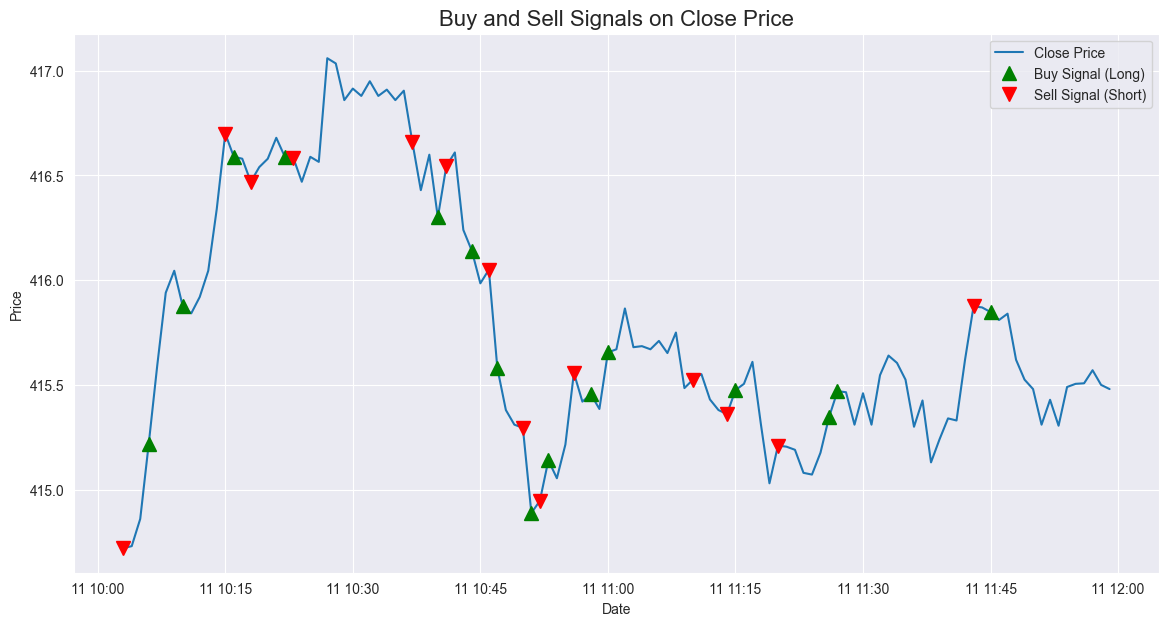

In [7]:
# Assuming 'processed_data' contains your signals
plt.figure(figsize=(14, 7))
plt.plot(
    processed_data.index, processed_data["Close"], label="Close Price"
)

buy_signals = processed_data[processed_data["Signal"] == 1]
plt.plot(
    buy_signals.index,
    buy_signals["Close"],
    "^",
    markersize=10,
    color="g",
    label="Buy Signal (Long)",
)

sell_signals = processed_data[processed_data["Signal"] == -1]
plt.plot(
    sell_signals.index,
    sell_signals["Close"],
    "v",
    markersize=10,
    color="r",
    label="Sell Signal (Short)",
)

plt.title("Buy and Sell Signals on Close Price", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

Running back tests for MSFT from 2024-10-11 09:30:00 to 2024-10-11 12:00:00...


/Users/ju/Works/perso/algo_day_trading/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


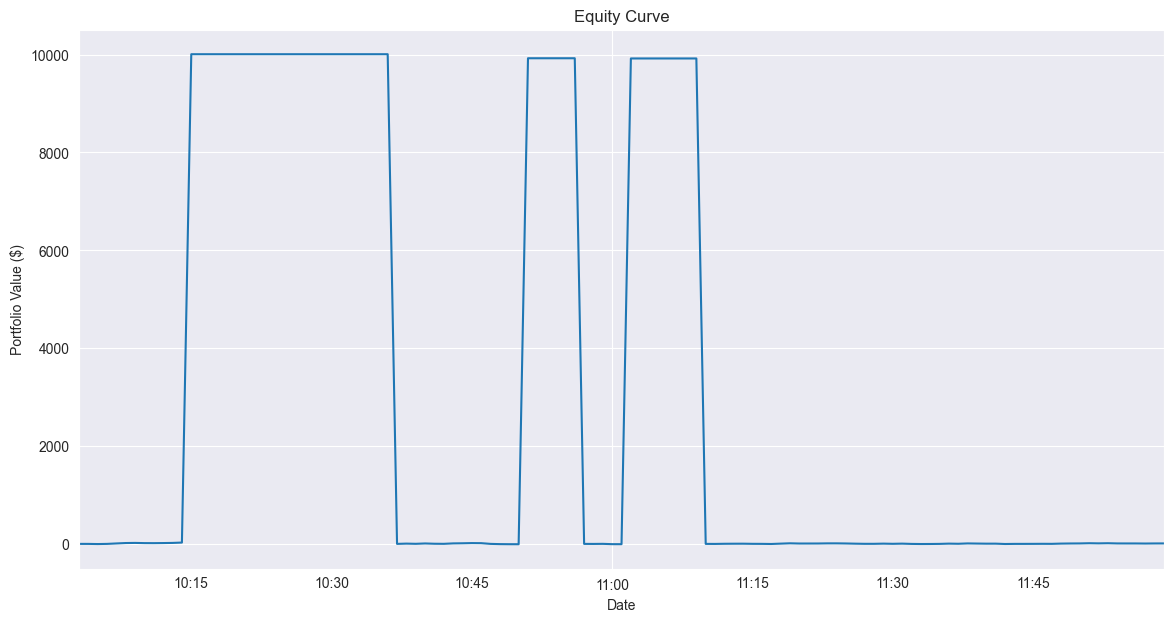

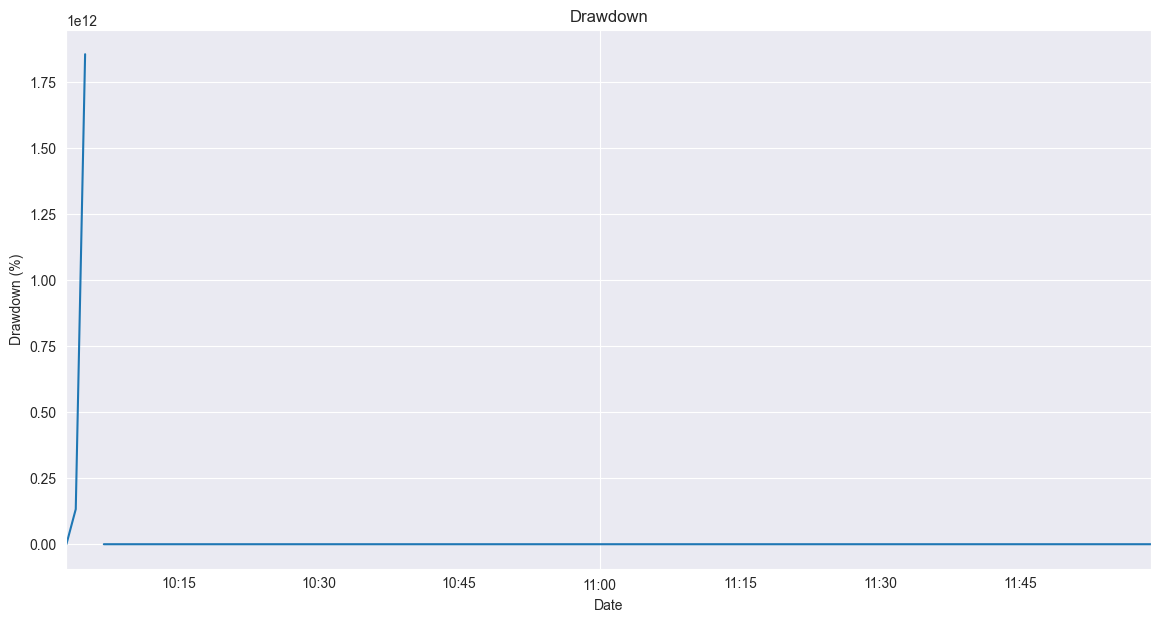

In [8]:
result = run_back_test(
    ticker=ticker,
    start_date=start_date,
    end_date=end_date,
)

In [9]:
print("result: ", result, "\n")

result:  {'transactions': [{'action': 'open', 'position_type': 'short', 'price': 414.7200012207031, 'amount': 24.088565684329197, 'date': Timestamp('2024-10-11 10:03:00-0400', tz='America/New_York')}, {'action': 'open', 'position_type': 'long', 'price': 415.2185974121094, 'amount': 24.052456900303884, 'date': Timestamp('2024-10-11 10:06:00-0400', tz='America/New_York')}, {'action': 'close', 'position_type': 'long', 'price': 416.49166220092775, 'amount': 24.052456900303884, 'date': Timestamp('2024-10-11 10:15:00-0400', tz='America/New_York'), 'pnl': 30.620335964348406}, {'action': 'open', 'position_type': 'short', 'price': 416.6600036621094, 'amount': 23.994701642403633, 'date': Timestamp('2024-10-11 10:37:00-0400', tz='America/New_York')}, {'action': 'open', 'position_type': 'long', 'price': 415.5799865722656, 'amount': 23.958733560670943, 'date': Timestamp('2024-10-11 10:47:00-0400', tz='America/New_York')}, {'action': 'close', 'position_type': 'long', 'price': 414.68055648803715, 'am